In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
titanic_data = sns.load_dataset('titanic')
# do not assign the result of dropna when using inplace=True — that returns None
# either use inplace=True without assignment, or assign the returned DataFrame.
titanic_data = titanic_data.dropna(subset=['age','embarked'])

titanic_data = pd.get_dummies(titanic_data,columns=['sex',
                                                    'embarked',
                                                    "class",
                                                    "who",
                                                    "deck"],drop_first=True)

x=titanic_data.drop(columns=['survived',
                             'alive',
                             'embark_town',
                             'adult_male',
                             'alone'],axis=1)
y=titanic_data['survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu",input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

early_stopping=EarlyStopping(patience=5)
history=model.fit(x_train,y_train,
                  validation_split=0.2,
                  epochs=100,
                  validation_data=(x_test,y_test),
                  callbacks=[early_stopping])

loss,accuracy=model.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/100
18/18 [==============================] - 1s 20ms/step - loss: 0.7169 - accuracy: 0.5589 - val_loss: 0.6983 - val_accuracy: 0.6154
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6415 - val_loss: 0.6626 - val_accuracy: 0.6503
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.7012 - val_loss: 0.6376 - val_accuracy: 0.6364
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.7364 - val_loss: 0.6147 - val_accuracy: 0.6783
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7592 - val_loss: 0.5964 - val_accuracy: 0.6853
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7627 - val_loss: 0.5820 - val_accuracy: 0.6923
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7698 - val_loss: 0.5703 - val_accuracy: 0.7063
Epoch 8/100


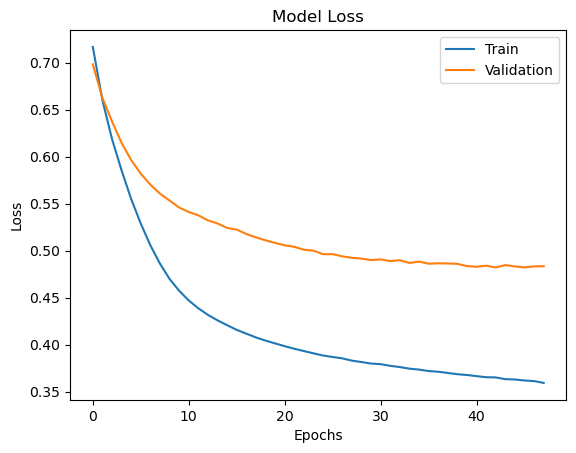

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()